In [133]:
# According to World Happiness Report in 2021, Korea shows low ladder score of happiness compare to other country with high GDP rank.
# We wondered why Korea is not so happy according to the report. And we want to know if we can be more happier.
# So we decided to analyze how and what variables are being used to calculate our happiness.

In [134]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn .cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from plotly.offline import iplot
import plotly.graph_objs as go
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [135]:
# firstly, we need to analyze our dataset.
# we will print overall dataset, shape, index, and columns

report=pd.read_csv('world-happiness-report-2021.csv')
report

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [136]:
report.shape #show shape of the array

(149, 20)

In [137]:
report.index #show index

RangeIndex(start=0, stop=149, step=1)

In [138]:
report.columns #show all column

# knowing each columns' meaning is important. followings are the result of our analyzation of each key features
# Ladder score is a same as happiness score
# upperwhisker,lowerwhisker is happiness score's whisker
# Logged GDP per capita means individual GDP level
# Social Support means whether there is anyone who can help in times of difficulty
# Healthy life expectancy means a healthy life period from birth
# Freedom to make life choices means whether satisfy or not to freedom to choice
# Generosity means whether donations were made last month.
# Perceptions of corruption means whether businesses or governments are corrupted as a whole.
# Dystopia+residual is how people feel bad about their future

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [139]:
# check missing values
report.isna().sum()

# it seems there's no any missing value in our dataset. so we don't have to deal with it.

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

In [140]:
# amount of contries
# there's 149 countries in our dataset
report['Country name'].size

149

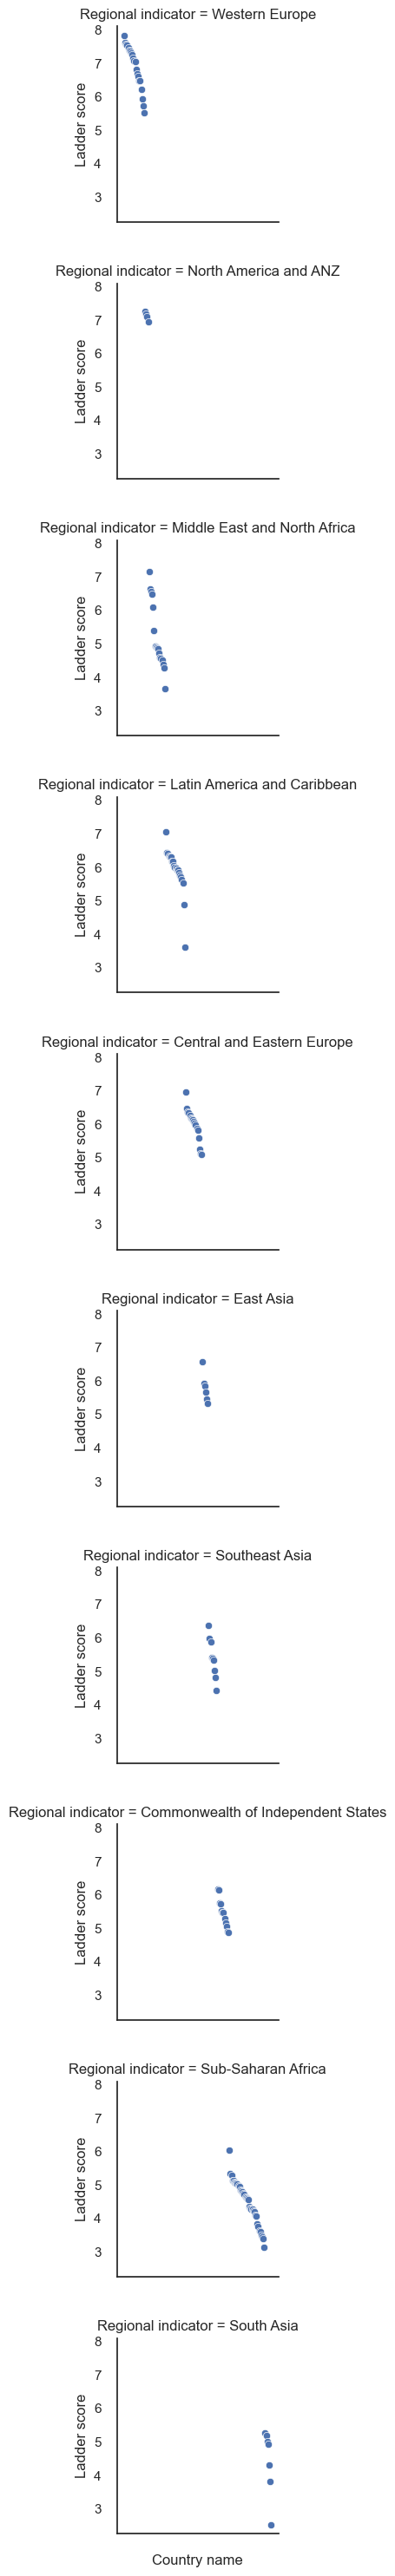

In [141]:
# these are the Graphs between country of each region and ladder score
# we can infer the correlation between region and ladder score
g=sns.FacetGrid(report,col='Regional indicator',col_wrap=1)
g.map(sns.scatterplot,'Country name','Ladder score')
g.set(xticklabels=[])

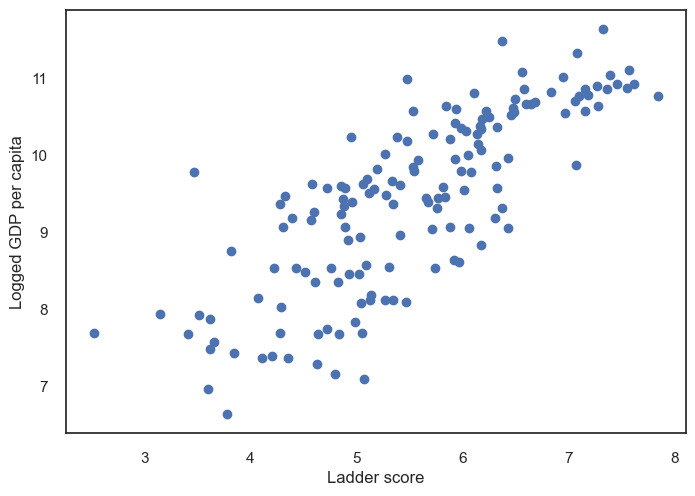

In [142]:
# The correlation between ladder score and Logged GDP per capita
x=report.loc[:,'Ladder score']
y=report.loc[:,'Logged GDP per capita']
plt.scatter(x,y)
plt.xlabel('Ladder score')
plt.ylabel('Logged GDP per capita')
plt.show()

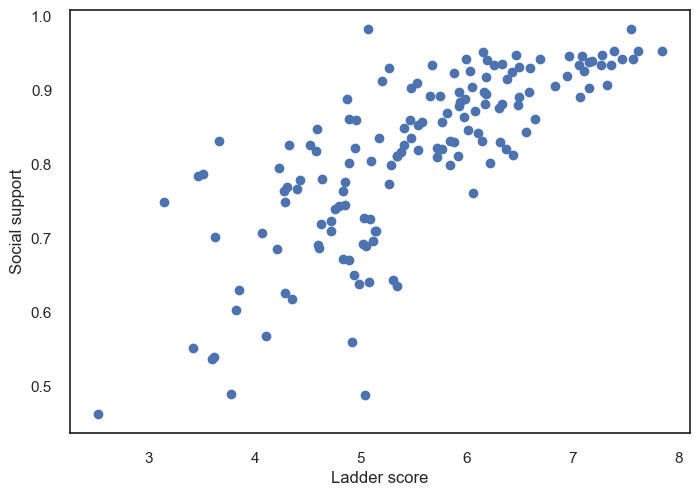

In [143]:
# The correlation between ladder score and Sccial support
x=report.loc[:,'Ladder score']
y=report.loc[:,'Social support']
plt.scatter(x,y)
plt.xlabel('Ladder score')
plt.ylabel('Social support')
plt.show()

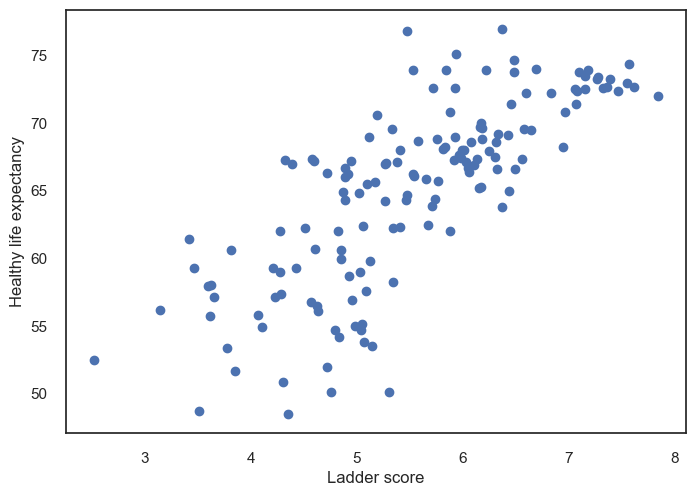

In [144]:
# The correlation between ladder score and Healthy life expectancy
x=report.loc[:,'Ladder score']
y=report.loc[:,'Healthy life expectancy']
plt.scatter(x,y)
plt.xlabel('Ladder score')
plt.ylabel('Healthy life expectancy')
plt.show()

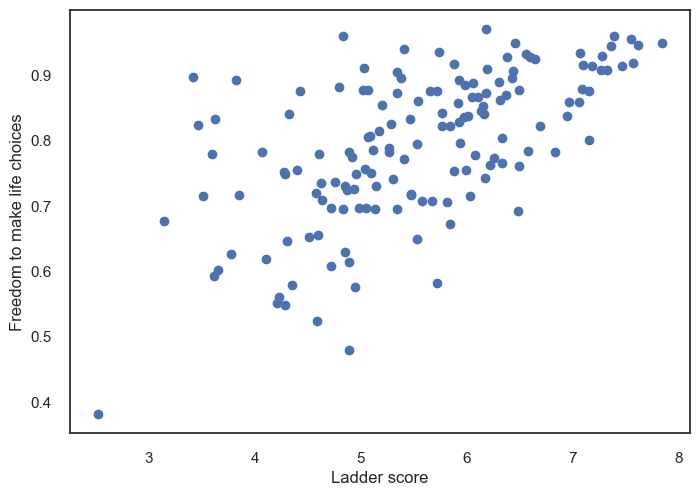

In [145]:
# The correlation between ladder score and Freedom to make life choices
x=report.loc[:,'Ladder score']
y=report.loc[:,'Freedom to make life choices']
plt.scatter(x,y)
plt.xlabel('Ladder score')
plt.ylabel('Freedom to make life choices')
plt.show()

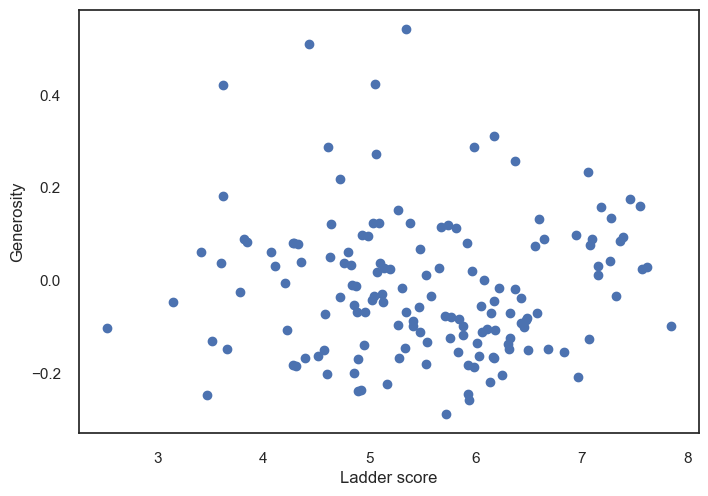

In [146]:
# The correlation between ladder score and Generosity
x=report.loc[:,'Ladder score']
y=report.loc[:,'Generosity']
plt.scatter(x,y)
plt.xlabel('Ladder score')
plt.ylabel('Generosity')
plt.show()

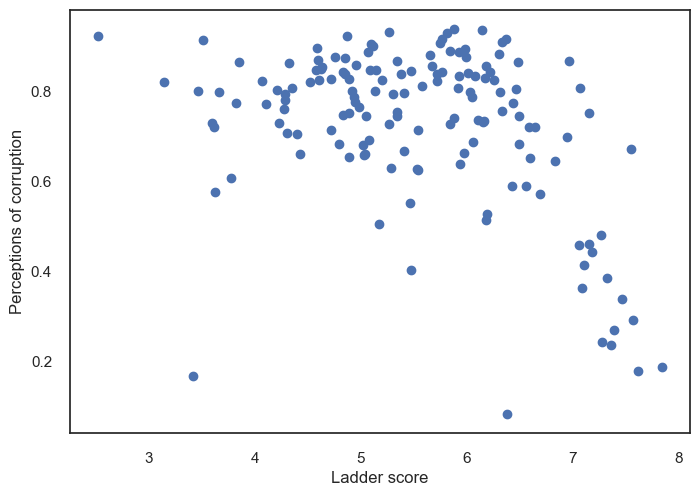

In [147]:
# The correlation between ladder score and Perception of corruption
x=report.loc[:,'Ladder score']
y=report.loc[:,'Perceptions of corruption']
plt.scatter(x,y)
plt.xlabel('Ladder score')
plt.ylabel('Perceptions of corruption')
plt.show()

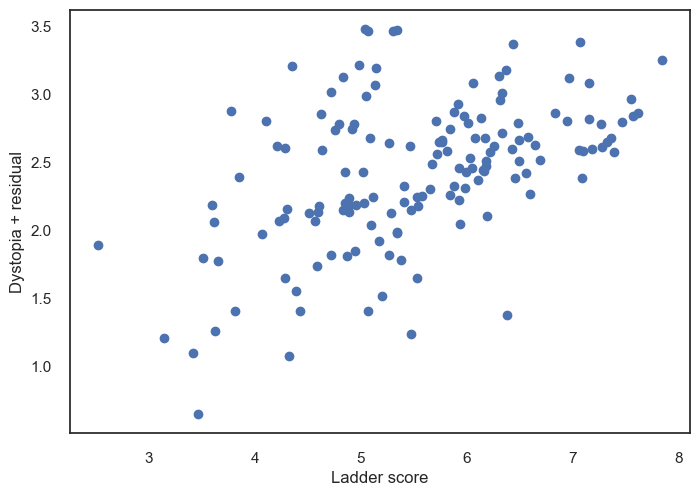

In [148]:
# The correlation between ladder score and Dystopia+residual
x=report.loc[:,'Ladder score']
y=report.loc[:,'Dystopia + residual']
plt.scatter(x,y)
plt.xlabel('Ladder score')
plt.ylabel('Dystopia + residual')
plt.show()

In [149]:
temp_report = report.drop(report.columns[3:6],axis='columns')

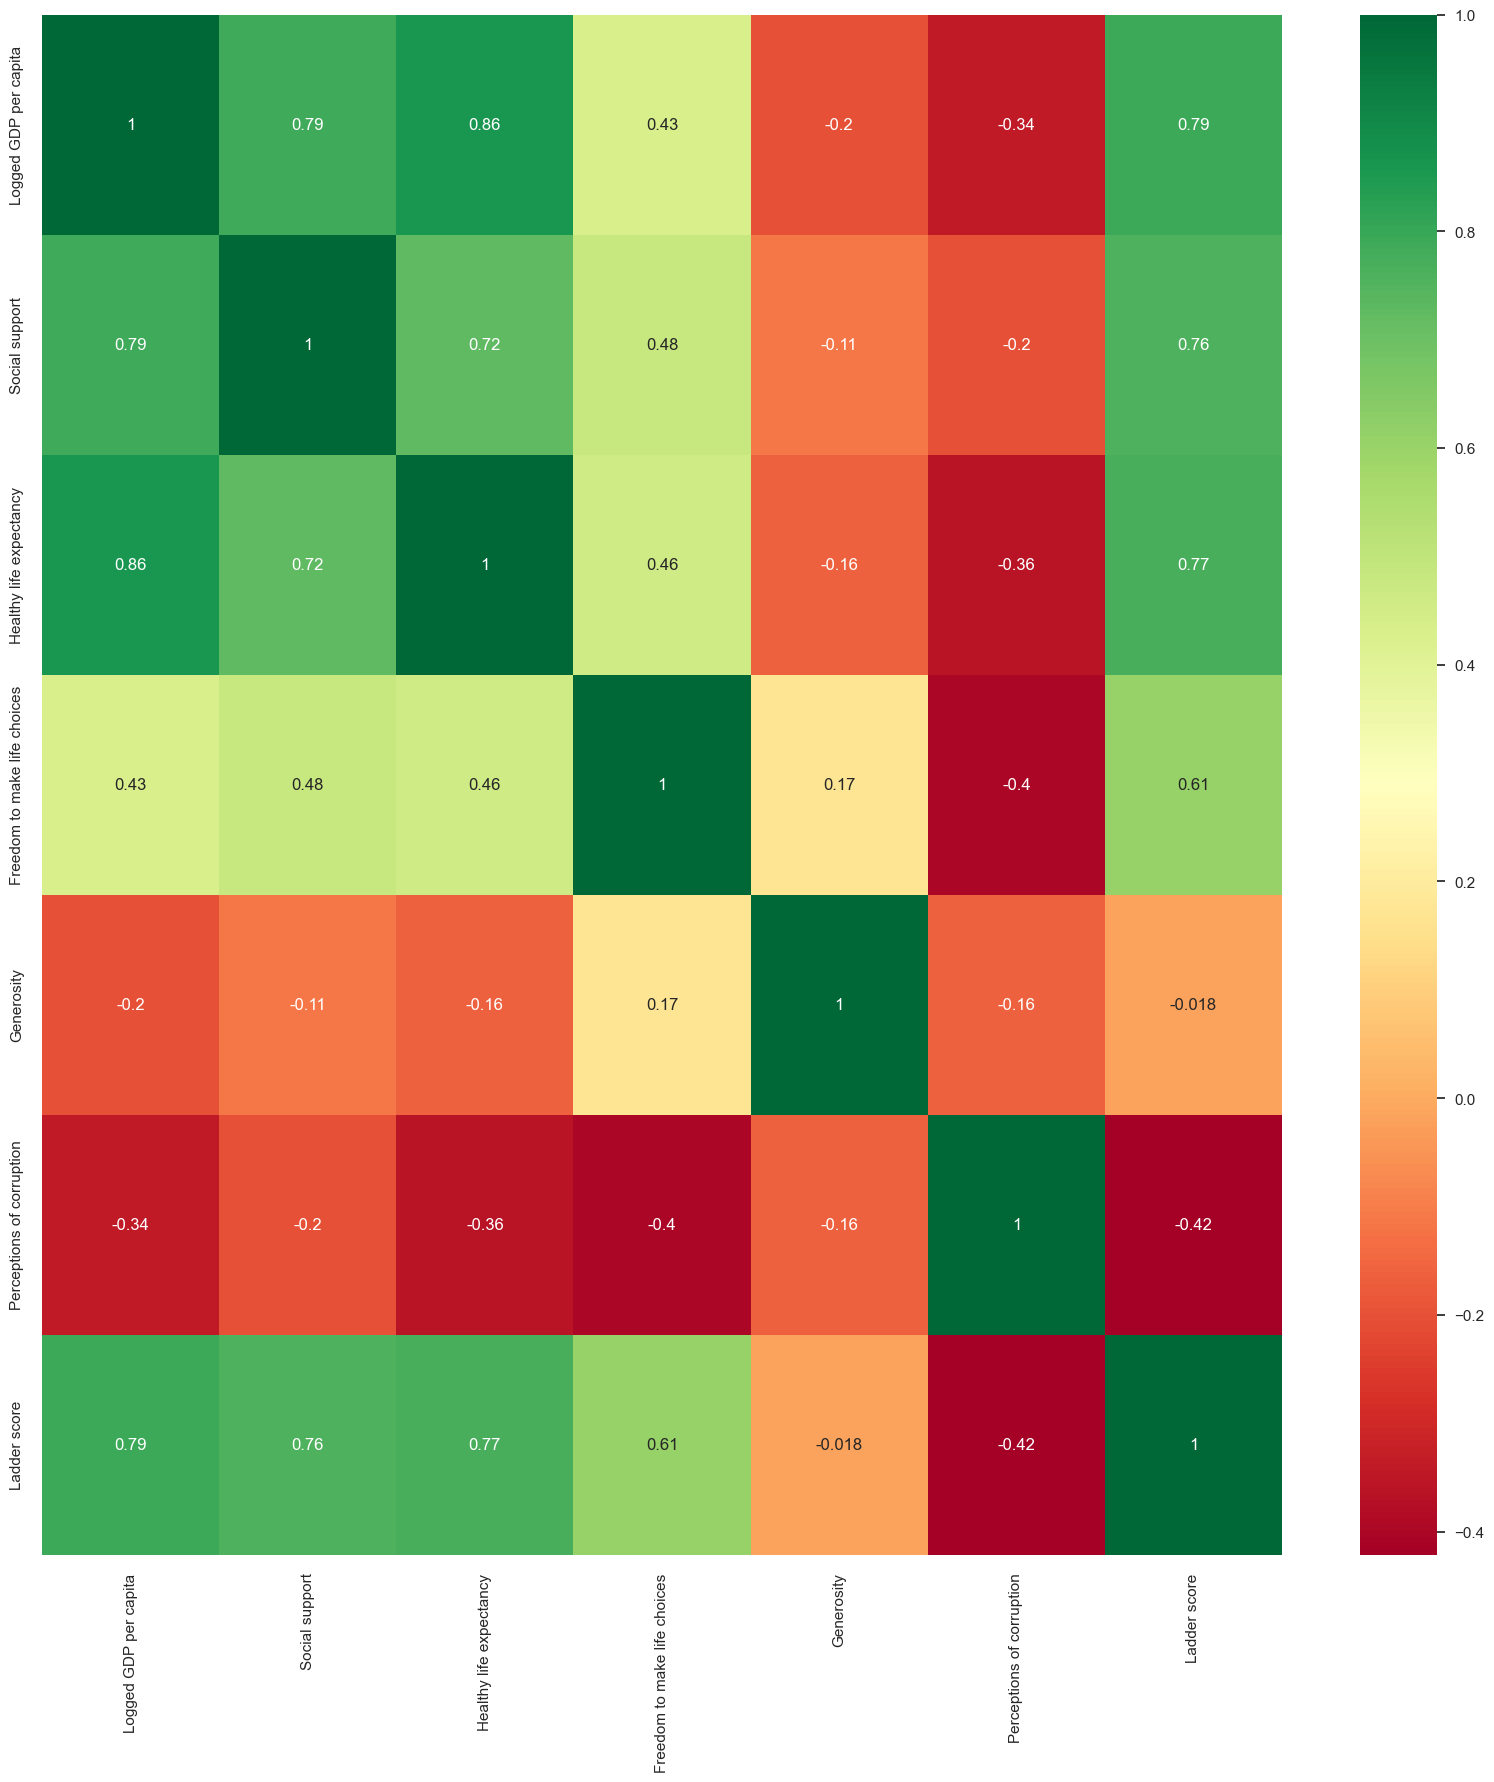

In [150]:
# in sum, the correlation is represented by this heatmap matrix
dataset_x = report.iloc[:, 6:12]
dataset_y = report.iloc[:, 2]


corr_report = pd.concat([dataset_x, dataset_y], axis=1)
corrmat = corr_report.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

graph = sns.heatmap(corr_report[top_corr_features].corr(), annot=True,cmap="RdYlGn")

In [151]:
# and this is correlation values derived by SeleckKBest.
# there are redundant values named Explained. so we will drop this values later.

X=temp_report.iloc[:,3:]
y=temp_report.iloc[:,2]
bestfeatures=SelectKBest(score_func=f_regression,k=14)
fit=bestfeatures.fit(X,y)
dfcolumns=pd.DataFrame(X.columns)
dfscores=pd.DataFrame(fit.scores_)

featureScores=pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns =['Specs','Score']
print(featureScores.nlargest(14,'Score'))

                                         Specs       Score
0                        Logged GDP per capita  243.666918
7             Explained by: Log GDP per capita  243.642327
9        Explained by: Healthy life expectancy  211.567894
2                      Healthy life expectancy  211.516275
1                               Social support  197.164694
8                 Explained by: Social support  197.141572
10  Explained by: Freedom to make life choices   86.115845
3                 Freedom to make life choices   86.097937
13                         Dystopia + residual   46.950266
12     Explained by: Perceptions of corruption   31.704722
5                    Perceptions of corruption   31.692749
4                                   Generosity    0.046586
11                    Explained by: Generosity    0.045710
6                     Ladder score in Dystopia    0.000000


c:\users\oldst\pycharmprojects\datascienceproject\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:308: RuntimeWarning:

invalid value encountered in sqrt



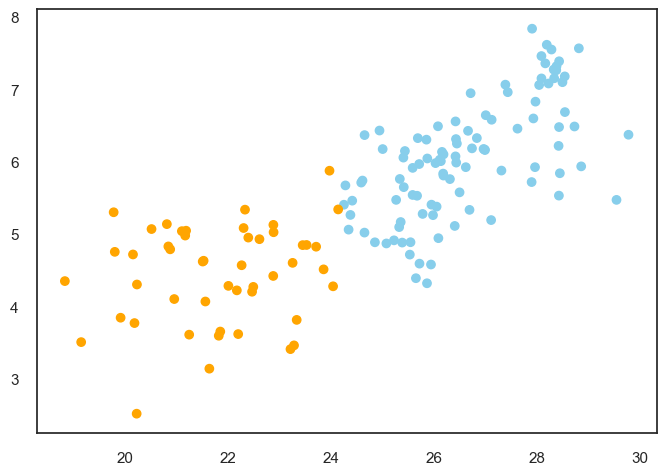

In [152]:
# by the above correlation heatmap matrix and SeleckKBest result,
# we know that Logged GDP per capita, Social support, and Healthy life expectancy is highly related feature with the ladder score.
# so, our decision is, select X value as the average value of three features is the best choice
# and we must avoid including Generosity and Perceptions of corruption as they have negative value.

mean = pd.DataFrame(data = report.iloc[:, 6:9].mean(axis='columns'), columns=['mean'])
cluster_dataset = pd.concat([dataset_y,mean], axis=1)

# case : cluster's number is 2.
# this means the countries in the whole dataset will be distinguished with 2 groups : happy and unhappy
KM = KMeans(n_clusters=2).fit(cluster_dataset)

colors = []
for i in KM.labels_:
  if i == 0:
    colors.append('skyblue')
  elif i == 1:
    colors.append('orange')

plt.scatter(cluster_dataset['mean'], cluster_dataset['Ladder score'], c=colors)

In [153]:
# Clustering Evaluation with Scikitlearn's Silhouette
# The silhouette sample calculates and returns the silhouette coefficient for the corresponding data set when the parameter is passed as above.
# Metric receives parameters to measure the distance between elements. The default is Euclidean
# Sample_size is entered if sampling is applied in the score calculation, and set to None if sampling is not used. The default is None.
# **kwds is a parameter used to pass the parameters required by some distance functions.

silhouette_dataset = pd.DataFrame(data=report, columns=['Logged GDP per capita', 'Social support', 'Healthy life expectancy'
                                                        , 'Freedom to make life choices'])

silhouette_dataset['cluster'] = KM.labels_

score_samples = silhouette_samples(silhouette_dataset, silhouette_dataset['cluster'])
silhouette_dataset['silhoutte_coeff'] = score_samples

average_score = silhouette_score(silhouette_dataset, silhouette_dataset['cluster'])

# silhouette_score value will between the 0 and 1. and if score getting bigger, the better result comes up.
# but the stability of each cluster's score is also important.
# that is, if the variance of each cluster's score getting bigger, the result will be getting worse.

print("average score")
print(average_score)
print(silhouette_dataset.groupby('cluster')['silhoutte_coeff'].mean())

average score
0.6332927869876798
cluster
0    0.643408
1    0.612983
Name: silhoutte_coeff, dtype: float64


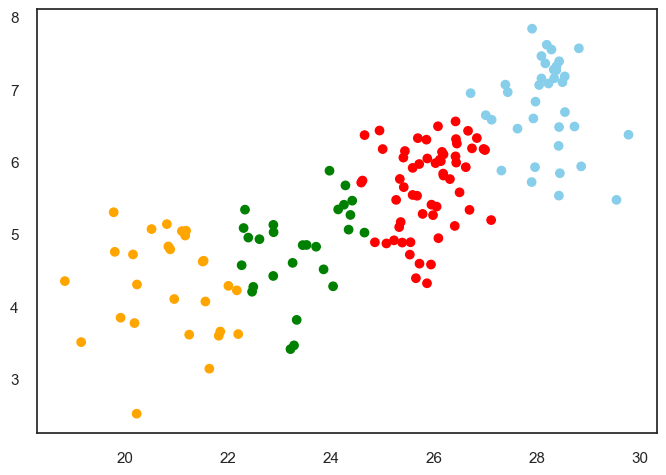

In [154]:
# case :  cluster's number is 4.
# this means the countries in the whole dataset will be distinguished with 4 groups : happy, not bad, not good, unhappy

KM = KMeans(n_clusters=4).fit(cluster_dataset)

colors = []
for i in KM.labels_:
  if i == 0:
    colors.append('skyblue')
  elif i == 1:
    colors.append('orange')
  elif i == 2:
      colors.append('green')
  elif i == 3:
      colors.append('red')

plt.scatter(cluster_dataset['mean'], cluster_dataset['Ladder score'], c=colors)
plt.show()

In [155]:
silhouette_dataset4 = pd.DataFrame(data=report, columns=['Logged GDP per capita', 'Social support', 'Healthy life expectancy'
                                                        , 'Freedom to make life choices'])

silhouette_dataset4['cluster'] = KM.labels_

score_samples = silhouette_samples(silhouette_dataset4, silhouette_dataset4['cluster'])
silhouette_dataset4['silhoutte_coeff'] = score_samples

average_score = silhouette_score(silhouette_dataset4, silhouette_dataset4['cluster'])
print("average score")
print(average_score)
print(silhouette_dataset4.groupby('cluster')['silhoutte_coeff'].mean())

average score
0.5583120210252618
cluster
0    0.672188
1    0.461903
2    0.405422
3    0.605556
Name: silhoutte_coeff, dtype: float64


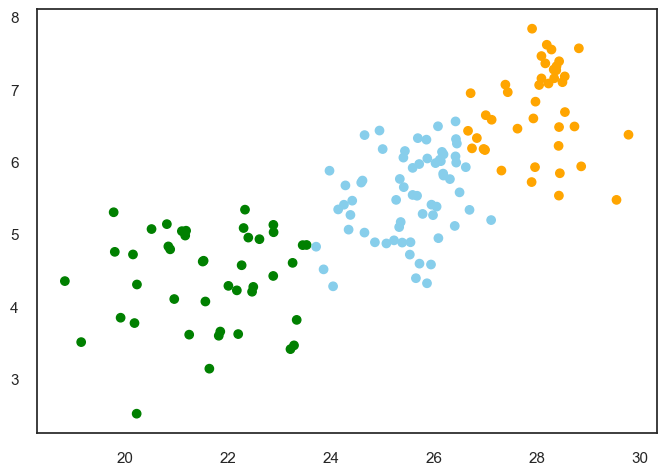

In [156]:
# case : cluster's number is 3
# this means the countries in the whole dataset will be distinguished with 3 groups : happy, normal, unhappy

mean = pd.DataFrame(data = report.iloc[:, 6:9].mean(axis='columns'), columns=['mean'])
cluster_dataset = pd.concat([dataset_y,mean], axis=1)

KM = KMeans(n_clusters=3).fit(cluster_dataset)

colors = []
for i in KM.labels_:
  if i == 0:
    colors.append('skyblue')
  elif i == 1:
    colors.append('orange')
  elif i == 2:
    colors.append('green')

plt.scatter(cluster_dataset['mean'], cluster_dataset['Ladder score'], c=colors)
plt.show()

In [157]:
silhouette_dataset3 = pd.DataFrame(data=report, columns=['Logged GDP per capita', 'Social support', 'Healthy life expectancy'
                                                        , 'Freedom to make life choices'])

silhouette_dataset3['cluster'] = KM.labels_

score_samples = silhouette_samples(silhouette_dataset3, silhouette_dataset3['cluster'])
silhouette_dataset3['silhoutte_coeff'] = score_samples

average_score = silhouette_score(silhouette_dataset3, silhouette_dataset3['cluster'])
print("average score")
print(average_score)
print(silhouette_dataset3.groupby('cluster')['silhoutte_coeff'].mean())

average score
0.5603644735645211
cluster
0    0.543254
1    0.568652
2    0.580233
Name: silhoutte_coeff, dtype: float64


AttributeError: 'KMeans' object has no attribute 'k'

AttributeError: 'KMeans' object has no attribute 'k'

AttributeError: 'KMeans' object has no attribute 'k'

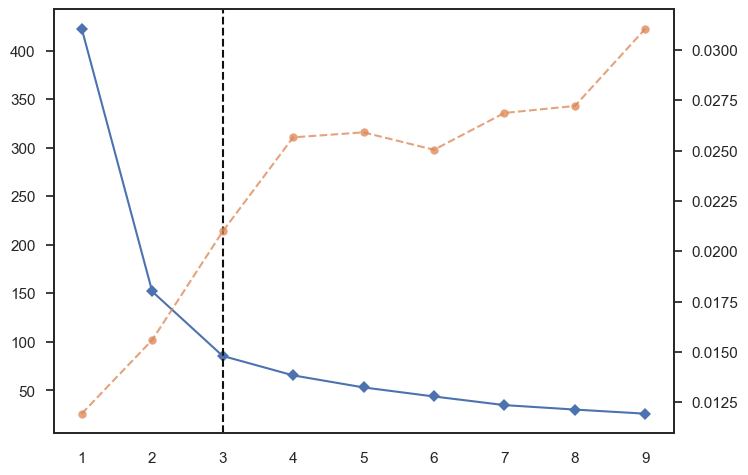

In [158]:
# now we have the result of cluster score in each case of k = 2, 3, 4.
# and with that result, the best k value is 2, because it has the highest score.
# But if k becomes 2, the world is extremely divided into happy and unhappy groups.
# this is not desirable situation. so we will additionally check elbow to decide proper k value.

# Yellowbrick extends the Scikit-Learn API to make model selection and hyperparameter tuning easier. it’s using Matplotlib.
from yellowbrick.cluster import KElbowVisualizer
from sklearn .cluster import KMeans

model = KMeans()
# Visualizers are the core objects in Yellowbrick.
# Visualizers can wrap a model estimator
# https://www.scikit-yb.org/en/latest/

df_GL = temp_report.iloc[:, 3:9]
df_GL_mean = pd.DataFrame(data = df_GL.mean(axis='columns'), columns=['mean'])
df_ladder_score = temp_report.loc[:, 'Ladder score']
df = pd.concat([df_GL_mean, df_ladder_score], axis=1)

#K-Elbow Plot : select k using the elbow method and various metrics
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(df)

In [159]:
# it seems that cluster's number is proper when 3.
# and with result of silhouette, when k=3, the deviations of each clusters is stable. (small)
# so we decide to choose 3 as cluster's number

# now we gonna save this clustered result to new data frame : clustered_report.
df_cluster = pd.DataFrame(data = KM.labels_, columns=['cluster'])
clustered_report = pd.DataFrame(data=report)
clustered_report = pd.concat([clustered_report, df_cluster], axis=1)
# dataset that includes cluster information
clustered_report

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,cluster
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,...,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253,1
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,...,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868,1
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,...,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839,1
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,...,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967,1
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,...,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,...,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800,2
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,...,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648,2
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,...,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095,2
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,...,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205,2


In [201]:
korea_cluster = clustered_report.loc[61]
korea_cluster = korea_cluster.drop(['Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 'Logged GDP per capita',
                                    'Social support', 'Healthy life expectancy', 'Freedom to make life choices',
                                    'Generosity', 'Perceptions of corruption', 'Ladder score in Dystopia',
                                    'Explained by: Log GDP per capita', 'Explained by: Social support',
                                    'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices',
                                    'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Dystopia + residual'])
korea_cluster

Country name          South Korea
Regional indicator      East Asia
Ladder score                5.845
cluster                         1
Name: 61, dtype: object

In [160]:

data = dict(type = 'choropleth',
           locations = clustered_report['Country name'],
           locationmode = 'country names',
           z = clustered_report['cluster'],
           text = clustered_report['Country name'],
           colorbar = {'title':'cluster'})
layout = dict(title = 'Happiness Index 2021',
             geo = dict(showframe = False,
                       projection = {'type': 'Mercator'}))
choromap3 = go.Figure(data = [data])
iplot(choromap3)


In [161]:
# Showes that 17 countries in western Europe are in the top 30 happiest countries
top30= report[:30]
print(top30['Regional indicator'].value_counts())

Western Europe                  17
North America and ANZ            4
Middle East and North Africa     4
Latin America and Caribbean      2
Central and Eastern Europe       2
East Asia                        1
Name: Regional indicator, dtype: int64


In [162]:
# now we are going to drop "Explained" values
new_report=report.drop(report.columns[3:6],axis='columns')
new_report=new_report.drop(new_report.columns[9:16],axis='columns')
new_report

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186,3.253
1,Denmark,Western Europe,7.620,10.933,0.954,72.700,0.946,0.030,0.179,2.868
2,Switzerland,Western Europe,7.571,11.117,0.942,74.400,0.919,0.025,0.292,2.839
3,Iceland,Western Europe,7.554,10.878,0.983,73.000,0.955,0.160,0.673,2.967
4,Netherlands,Western Europe,7.464,10.932,0.942,72.400,0.913,0.175,0.338,2.798
...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915,1.800
145,Botswana,Sub-Saharan Africa,3.467,9.782,0.784,59.269,0.824,-0.246,0.801,0.648
146,Rwanda,Sub-Saharan Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,7.943,0.750,56.201,0.677,-0.047,0.821,1.205


In [163]:
# and with the dataset without Explained data, we will check feature importances again by SelectKBest

X=new_report.iloc[:,3:]
y=new_report.iloc[:,2]
bestfeatures=SelectKBest(score_func=f_regression,k=7)
fit=bestfeatures.fit(X,y)
dfcolumns=pd.DataFrame(X.columns)
dfscores=pd.DataFrame(fit.scores_)

featureScores=pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns =['Specs','Score']
print(featureScores.nlargest(7,'Score'))

                          Specs       Score
0         Logged GDP per capita  243.666918
2       Healthy life expectancy  211.516275
1                Social support  197.164694
3  Freedom to make life choices   86.097937
6           Dystopia + residual   46.950266
5     Perceptions of corruption   31.692749
4                    Generosity    0.046586


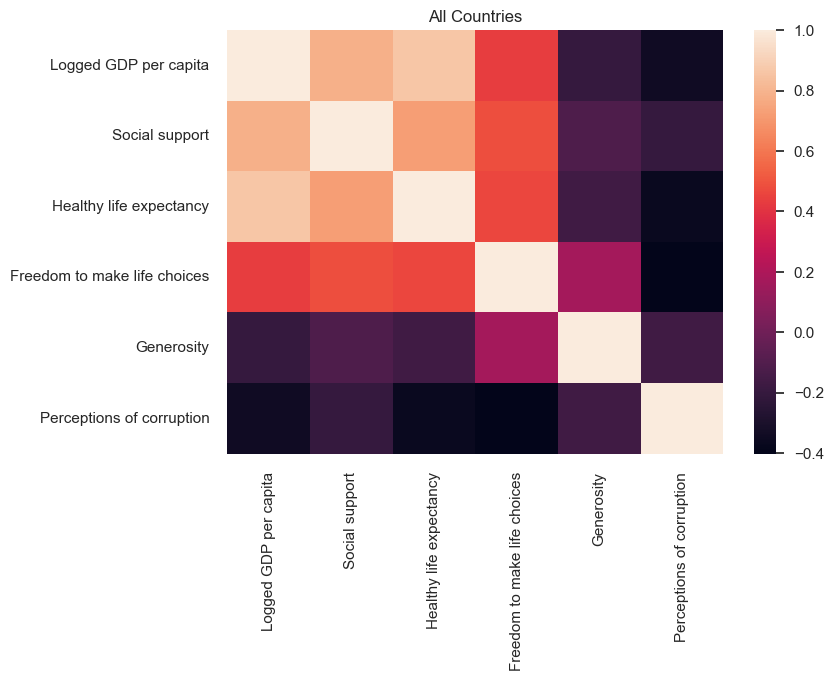

In [164]:
# again, plot correlation with the heatmap matrix
sns.set_theme(style="white")
ax = sns.heatmap(new_report[new_report.columns[3:-1]].corr()).set_title("All Countries")


In [165]:
# update dataset by dropping Dystopia + residual column
# Dystopia is an imaginary country that has the world's least-happy people.
# The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared
# The residuals, or unexplained components, differ for each country,
# reflecting the extent to which the six variables either over- or under-explain average 2019-2021 life evaluations.
new_report=new_report.drop(new_report.columns[9],axis='columns')
new_report

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.700,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.400,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.000,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.400,0.913,0.175,0.338
...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
145,Botswana,Sub-Saharan Africa,3.467,9.782,0.784,59.269,0.824,-0.246,0.801
146,Rwanda,Sub-Saharan Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167
147,Zimbabwe,Sub-Saharan Africa,3.145,7.943,0.750,56.201,0.677,-0.047,0.821


C:\Users\oldst\AppData\Local\Temp\ipykernel_9292\1203240310.py:5: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



<AxesSubplot:>

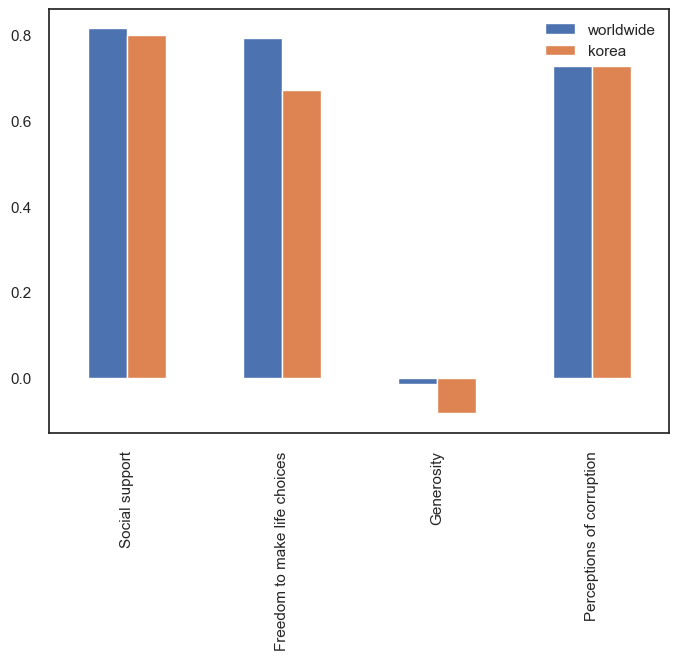

In [194]:
# 한국 비교 보여줄 plot 여기서 그려주기
# mean = pd.DataFrame(data = report.iloc[:, 6:9].mean(axis='columns'), columns=['mean'])
# cluster_dataset = pd.concat([dataset_y,mean], axis=1)

world_mean = report.mean()
korea = report.loc[61]

compare_dataset = pd.concat([world_mean, korea], axis=1)
cd1 = compare_dataset.iloc[4:10]
cd1.columns = ['worldwide', 'korea']

cd1 = cd1.drop(['Logged GDP per capita', 'Healthy life expectancy'])
cd1.plot.bar()


In [167]:
# now we have to prepare dataset for the linear regression.
# first, we will apply get_dummies so that we prevent the unpredicted and unwanted co-relation between features
df=pd.get_dummies(data=new_report, columns=['Regional indicator'])
df

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Regional indicator_Central and Eastern Europe,Regional indicator_Commonwealth of Independent States,Regional indicator_East Asia,Regional indicator_Latin America and Caribbean,Regional indicator_Middle East and North Africa,Regional indicator_North America and ANZ,Regional indicator_South Asia,Regional indicator_Southeast Asia,Regional indicator_Sub-Saharan Africa,Regional indicator_Western Europe
0,Finland,7.842,10.775,0.954,72.000,0.949,-0.098,0.186,0,0,0,0,0,0,0,0,0,1
1,Denmark,7.620,10.933,0.954,72.700,0.946,0.030,0.179,0,0,0,0,0,0,0,0,0,1
2,Switzerland,7.571,11.117,0.942,74.400,0.919,0.025,0.292,0,0,0,0,0,0,0,0,0,1
3,Iceland,7.554,10.878,0.983,73.000,0.955,0.160,0.673,0,0,0,0,0,0,0,0,0,1
4,Netherlands,7.464,10.932,0.942,72.400,0.913,0.175,0.338,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,3.512,7.926,0.787,48.700,0.715,-0.131,0.915,0,0,0,0,0,0,0,0,1,0
145,Botswana,3.467,9.782,0.784,59.269,0.824,-0.246,0.801,0,0,0,0,0,0,0,0,1,0
146,Rwanda,3.415,7.676,0.552,61.400,0.897,0.061,0.167,0,0,0,0,0,0,0,0,1,0
147,Zimbabwe,3.145,7.943,0.750,56.201,0.677,-0.047,0.821,0,0,0,0,0,0,0,0,1,0


In [168]:
# and then define X and y, which will be used in linear regression
X=df.iloc[:,2:8]
y=df.iloc[:,1]
X=pd.DataFrame(X, columns = ['Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption'])
y=pd.DataFrame(y, columns=['Ladder score'])
X

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,10.775,0.954,72.000,0.949,-0.098,0.186
1,10.933,0.954,72.700,0.946,0.030,0.179
2,11.117,0.942,74.400,0.919,0.025,0.292
3,10.878,0.983,73.000,0.955,0.160,0.673
4,10.932,0.942,72.400,0.913,0.175,0.338
...,...,...,...,...,...,...
144,7.926,0.787,48.700,0.715,-0.131,0.915
145,9.782,0.784,59.269,0.824,-0.246,0.801
146,7.676,0.552,61.400,0.897,0.061,0.167
147,7.943,0.750,56.201,0.677,-0.047,0.821


In [169]:
# scaling the dataset before model fitting
# we used StandardScaler

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
scaler.fit(y)
y=scaler.transform(y)
X=pd.DataFrame(X, columns = ['Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption'])
y=pd.DataFrame(y, columns=['Ladder score'])
print(X)
print(y)

     Logged GDP per capita  Social support  Healthy life expectancy  \
0                 1.162885        1.216171                 1.039750   
1                 1.299717        1.216171                 1.143618   
2                 1.459064        1.111370                 1.395869   
3                 1.252086        1.469440                 1.188133   
4                 1.298851        1.111370                 1.099103   
..                     ...             ...                      ...   
144              -1.304407       -0.242308                -2.417575   
145               0.302927       -0.268508                -0.849315   
146              -1.520912       -2.294659                -0.533110   
147              -1.289685       -0.565444                -1.304554   
148              -1.504458       -3.071932                -1.854758   

     Freedom to make life choices  Generosity  Perceptions of corruption  
0                        1.393550   -0.551886                  -3.031228

In [170]:
# and we used sklearn's train test split
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=23)

In [171]:
# defining linear regression model function
# we have 1 parameter : test size so that we can easily test various test size with the same condition
# firstly, we used all of the top 3 best scored in select K best.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
def multi_linRegression(testSize):

    a=X.iloc[:,0:3]
    b=report['Ladder score']
    from sklearn.model_selection import train_test_split
    train_a,test_a,train_b,test_b=train_test_split(a,b,test_size=testSize,random_state=24)
    #Multiple Linear Regression Model Using Top 3 features
    lin = LinearRegression()
    lin.fit(train_X, train_y) 
    predict = lin.predict(test_X)

    #Evaluate the model
    print('score: ', lin.score(test_X, test_y))
    print('MSE: ',mean_squared_error(predict, test_y))
    print('RMSE: ',mean_squared_error(predict, test_y)**1/2)
        
    #Cross Validation
    from sklearn.model_selection import cross_val_score
    k = 5
    cv = cross_val_score(lin , train_a, train_b, cv = k)
    print('Cross Validation Scores: ' , cv)
    print('Cross Validation Average: ', np.mean(cv))

In [172]:
# secondly, we used each of the three best scored in select K best.
# 1. GDP only

def GDP_linRegression(testSize):
    a=X['Logged GDP per capita']
    b=y['Ladder score']
    from sklearn.model_selection import train_test_split
    train_a,test_a,train_b,test_b=train_test_split(a,b,test_size=testSize,random_state=24)

    plt.plot(train_a,train_b,'o')
    plt.show()

    line_fitter = LinearRegression()
    line_fitter.fit(train_a.values.reshape(-1,1), train_b)
    predict = line_fitter.predict(test_a.values.reshape(-1,1))

    plt.plot(test_a, test_b, 'o')
    plt.plot(test_a,line_fitter.predict(test_a.values.reshape(-1,1)))
    plt.show()
    #Evaluate the model
    print('score: ', line_fitter.score(test_a.values.reshape(-1,1), test_b.values.reshape(-1,1)))
    print('MSE: ',mean_squared_error(predict, test_b.values.reshape(-1,1)))
    print('RMSE: ',mean_squared_error(predict, test_b.values.reshape(-1,1))**1/2)
    
      #Cross Validation
    from sklearn.model_selection import cross_val_score
    k = 5
    cv = cross_val_score(line_fitter , train_a.values.reshape(-1,1), train_b, cv = k)
    print('Cross Validation Scores: ' , cv)
    print('Cross Validation Average: ', np.mean(cv))

In [173]:
# 2. Healthyness only
def Healthy_linRegression(testSize) :
    a=X['Healthy life expectancy']
    b=y['Ladder score']
    from sklearn.model_selection import train_test_split
    train_a,test_a,train_b,test_b=train_test_split(a,b,test_size=testSize,random_state=24)

    plt.plot(train_a,train_b,'o')
    plt.show()

    line_fitter = LinearRegression()
    line_fitter.fit(train_a.values.reshape(-1,1), train_b)
    predict = line_fitter.predict(test_a.values.reshape(-1,1))

    plt.plot(test_a, test_b, 'o')
    plt.plot(test_a,line_fitter.predict(test_a.values.reshape(-1,1)))
    plt.show()
    #Evaluate the model
    print('score: ', line_fitter.score(test_a.values.reshape(-1,1), test_b.values.reshape(-1,1)))
    print('MSE: ',mean_squared_error(predict, test_b.values.reshape(-1,1)))
    print('RMSE: ',mean_squared_error(predict, test_b.values.reshape(-1,1))**1/2)
    
      #Cross Validation
    from sklearn.model_selection import cross_val_score
    k = 5
    cv = cross_val_score(line_fitter , train_a.values.reshape(-1,1), train_b, cv = k)
    print('Cross Validation Scores: ' , cv)
    print('Cross Validation Average: ', np.mean(cv))

In [174]:
# 3. Social support only

def Social_linRegression(testSize) :
    a=X['Social support']
    b=report['Ladder score']
    from sklearn.model_selection import train_test_split
    train_a,test_a,train_b,test_b=train_test_split(a,b,test_size=testSize,random_state=22)

    plt.plot(train_a,train_b,'o')
    plt.show()

    line_fitter = LinearRegression()
    line_fitter.fit(train_a.values.reshape(-1,1), train_b)
    predict = line_fitter.predict(test_a.values.reshape(-1,1))

    plt.plot(test_a, test_b, 'o')
    plt.plot(test_a,line_fitter.predict(test_a.values.reshape(-1,1)))
    plt.show()
    #Evaluate the model
    print('score: ', line_fitter.score(test_a.values.reshape(-1,1), test_b.values.reshape(-1,1)))
    print('MSE: ',mean_squared_error(predict, test_b.values.reshape(-1,1)))
    print('RMSE: ',mean_squared_error(predict, test_b.values.reshape(-1,1))**1/2)
    
      #Cross Validation
    from sklearn.model_selection import cross_val_score
    k = 5
    cv = cross_val_score(line_fitter , train_a.values.reshape(-1,1), train_b, cv = k)
    print('Cross Validation Scores: ' , cv)
    print('Cross Validation Average: ', np.mean(cv))

In [175]:
# now we will check the score of cases : test size 0.2, 0.3, 0.4

print("test size 0.2")
print(multi_linRegression(0.2))
print("test size 0.3")
print(multi_linRegression(0.3))
print("test size 0.4")
print(multi_linRegression(0.4))

test size 0.2
score:  0.7920702990046679
MSE:  0.21892840619162346
RMSE:  0.10946420309581173
Cross Validation Scores:  [0.68816938 0.49868576 0.69740996 0.80661513 0.62318997]
Cross Validation Average:  0.66281403774506
None
test size 0.3
score:  0.7920702990046679
MSE:  0.21892840619162346
RMSE:  0.10946420309581173
Cross Validation Scores:  [0.72795597 0.63086299 0.64820054 0.77437071 0.61948164]
Cross Validation Average:  0.6801743688758506
None
test size 0.4
score:  0.7920702990046679
MSE:  0.21892840619162346
RMSE:  0.10946420309581173
Cross Validation Scores:  [0.45902958 0.74910646 0.76504326 0.7174083  0.49160605]
Cross Validation Average:  0.636438729852372
None


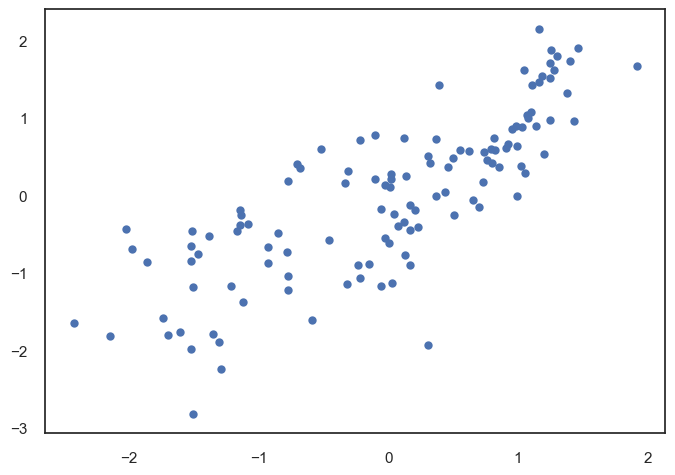

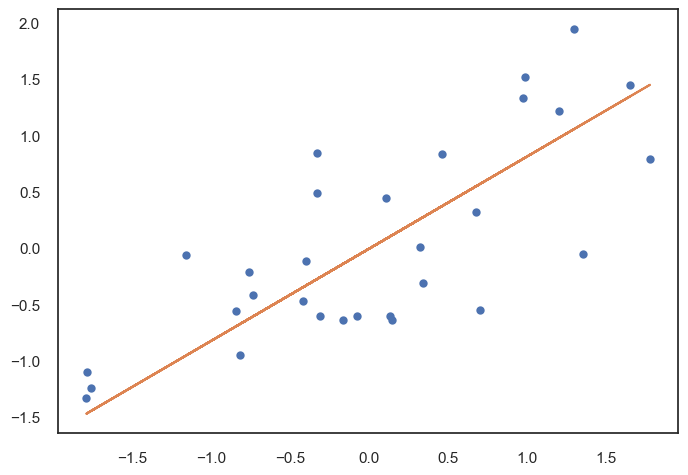

score:  0.5386512857376093
MSE:  0.3462976832586413
RMSE:  0.17314884162932065
Cross Validation Scores:  [0.68575441 0.46403745 0.46886819 0.75045308 0.50085979]
Cross Validation Average:  0.5739945854844777


In [176]:
# GDP only with the test size 0.2
GDP_linRegression(0.2)

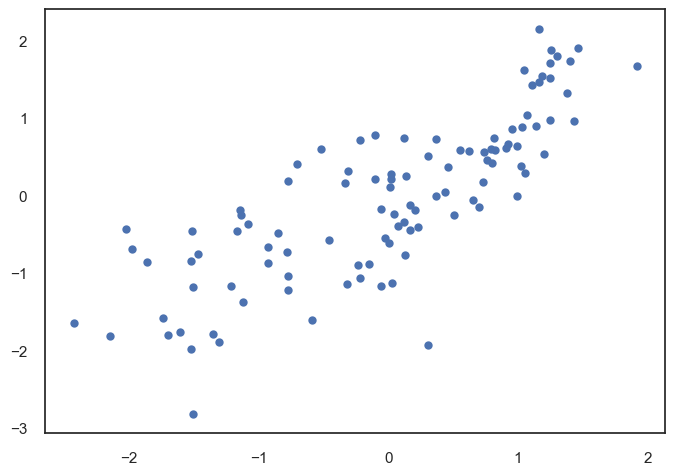

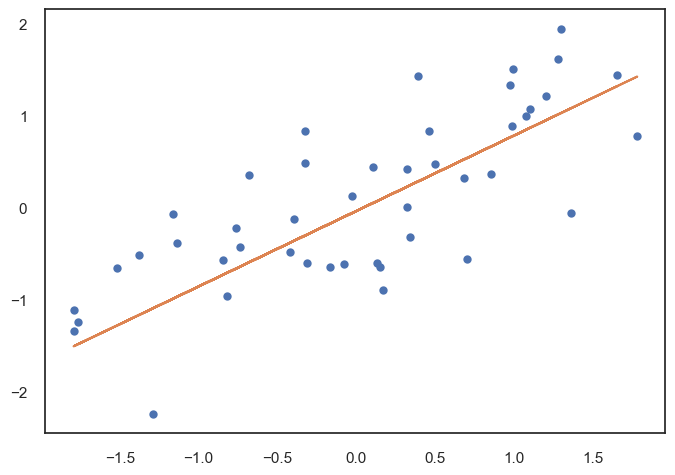

score:  0.5495091892507256
MSE:  0.3718183180084374
RMSE:  0.1859091590042187
Cross Validation Scores:  [0.73628715 0.62091609 0.24338713 0.71155692 0.50207112]
Cross Validation Average:  0.5628436837104768


In [177]:
# GDP only with the test size 0.3
GDP_linRegression(0.3)

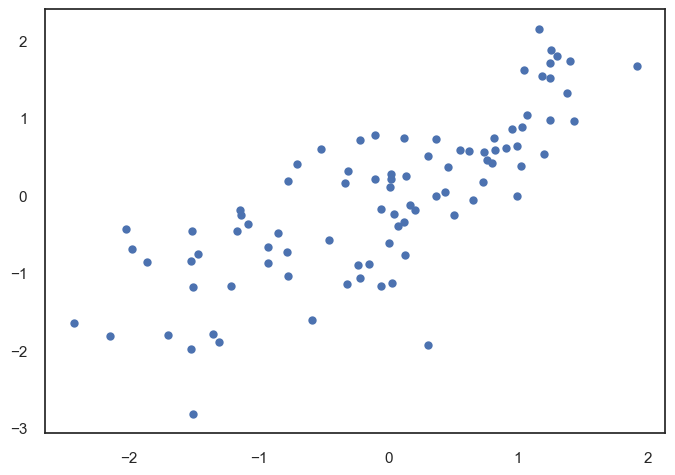

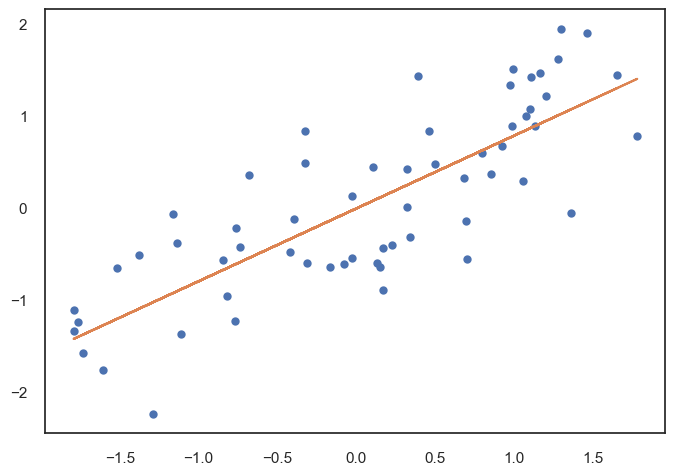

score:  0.6440692800206868
MSE:  0.3342150343949113
RMSE:  0.16710751719745565
Cross Validation Scores:  [0.49249737 0.5006537  0.67753184 0.67867537 0.32575622]
Cross Validation Average:  0.535022898640394


In [178]:
# GDP only with the test size 0.4
GDP_linRegression(0.4)

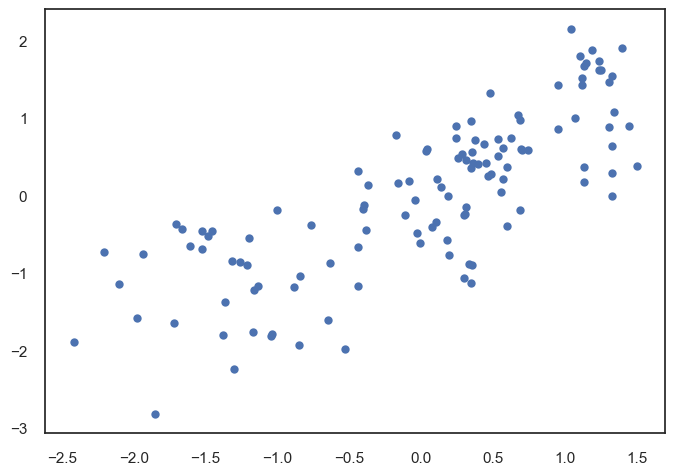

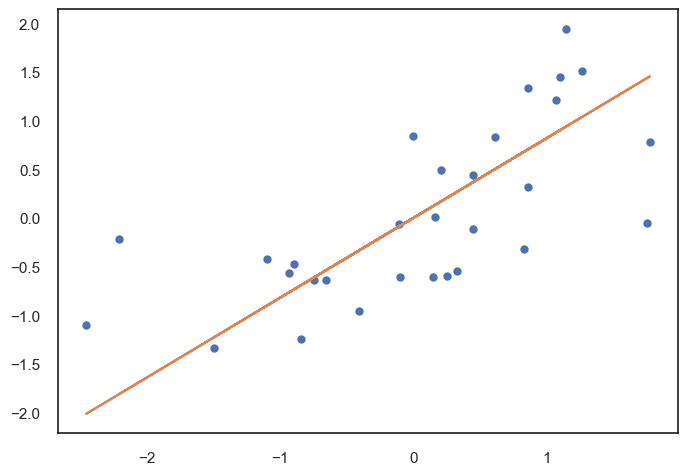

score:  0.3948588417431813
MSE:  0.4542312022779392
RMSE:  0.2271156011389696
Cross Validation Scores:  [0.68927882 0.42365146 0.48061616 0.70676415 0.50421303]
Cross Validation Average:  0.5609047244289723


In [179]:
# Healthy life expectancy only with the test size 0.2
Healthy_linRegression(0.2)

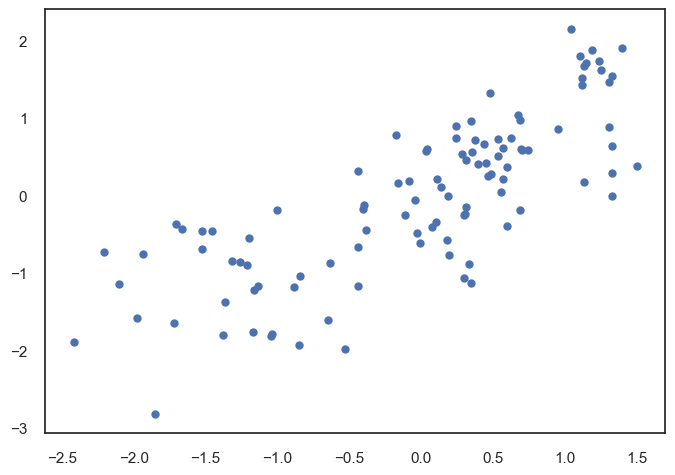

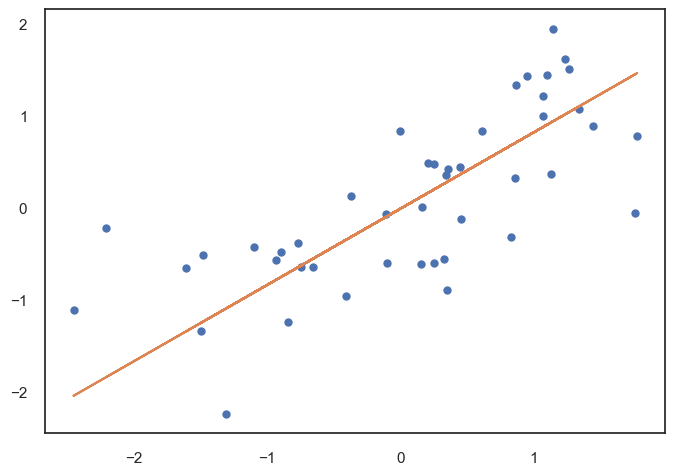

score:  0.48846708484045764
MSE:  0.4222001949478835
RMSE:  0.21110009747394176
Cross Validation Scores:  [0.73344433 0.43506797 0.50792242 0.65320922 0.52574011]
Cross Validation Average:  0.5710768095402039


In [180]:
# Healthy life expectancy only with the test size 0.3
Healthy_linRegression(0.3)

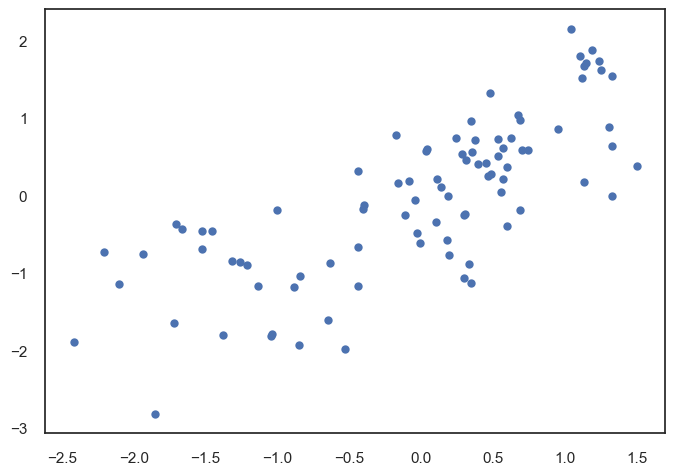

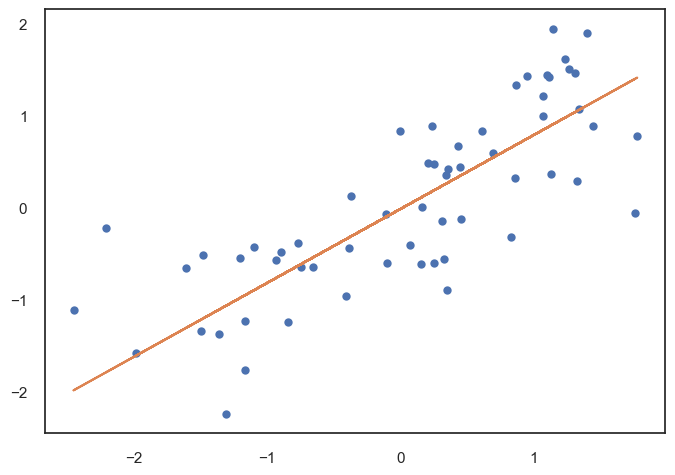

score:  0.6055452254396317
MSE:  0.37038869826856363
RMSE:  0.18519434913428182
Cross Validation Scores:  [0.35246931 0.42994638 0.62059354 0.68975148 0.35546821]
Cross Validation Average:  0.48964578361694466


In [181]:
# Healthy life expectancy only with the test size 0.4
Healthy_linRegression(0.4)

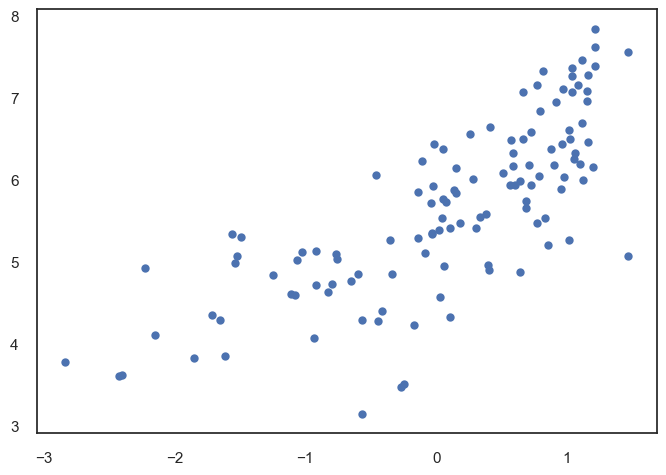

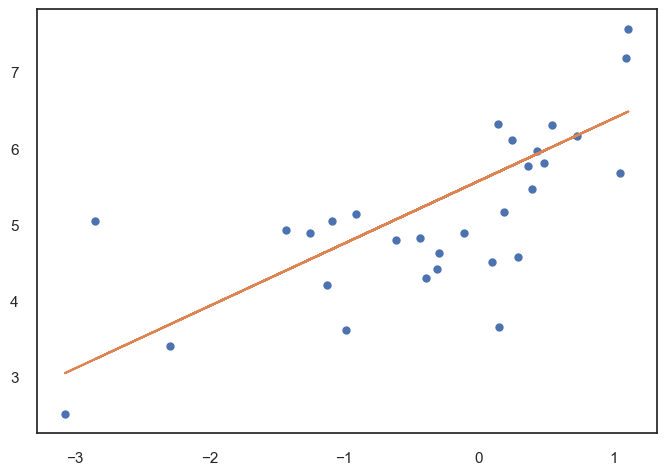

score:  0.4525671185080121
MSE:  0.6286381073928264
RMSE:  0.3143190536964132
Cross Validation Scores:  [0.516216   0.57993226 0.59487304 0.37506755 0.67045964]
Cross Validation Average:  0.547309697215226


In [182]:
# Social support only with the test size 0.2
Social_linRegression(0.2)

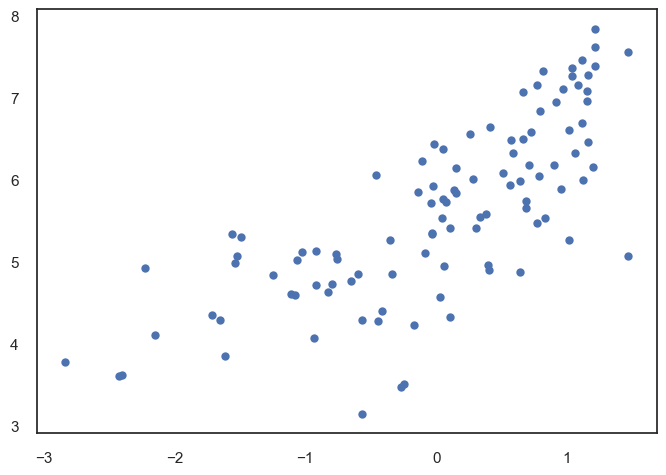

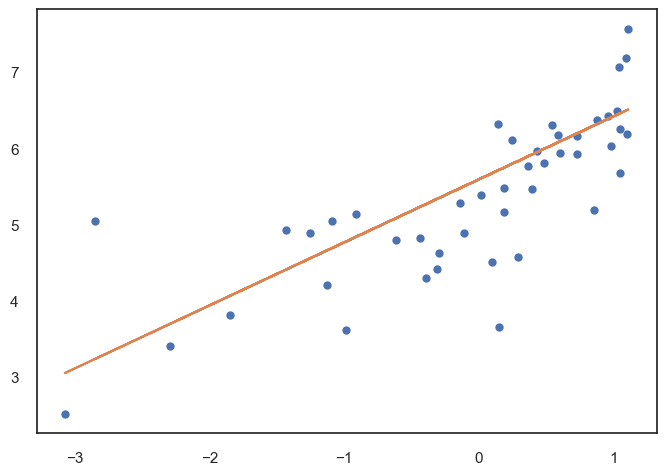

score:  0.5598977892042093
MSE:  0.4746043637395019
RMSE:  0.23730218186975094
Cross Validation Scores:  [0.41015508 0.66134281 0.46048522 0.62219056 0.62060387]
Cross Validation Average:  0.5549555077982824


In [183]:
# Social support only with the test size 0.3
Social_linRegression(0.3)

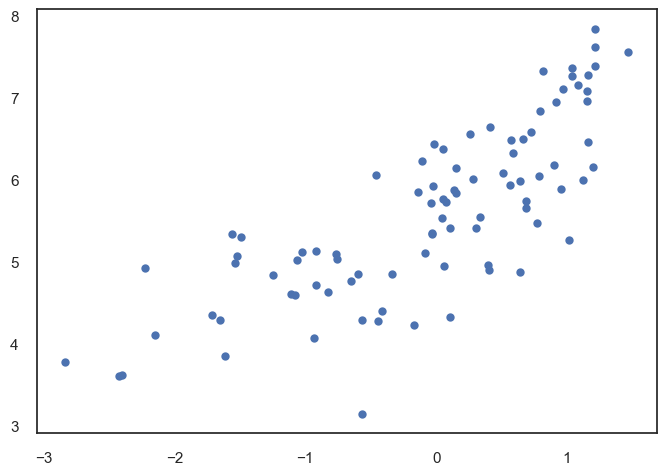

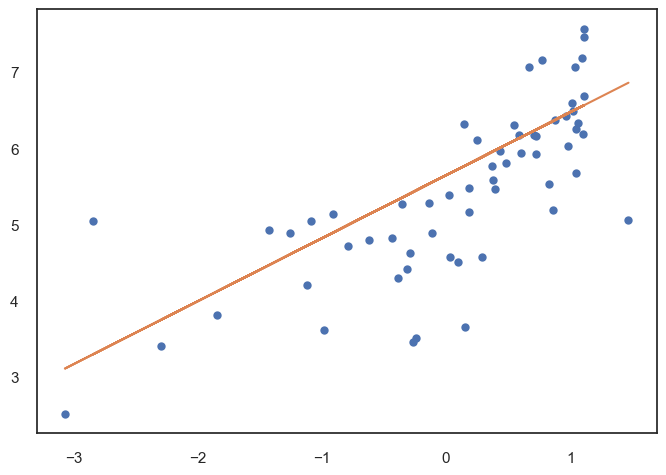

score:  0.47406862783018155
MSE:  0.6298967920292131
RMSE:  0.31494839601460656
Cross Validation Scores:  [0.74318899 0.59200609 0.28359589 0.63666534 0.62701121]
Cross Validation Average:  0.5764935043412048


In [184]:
# Social support only with the test size 0.4
Social_linRegression(0.4)

In [185]:
# next, we will additionally apply decision tree and KNN algorithm for comparing and deciding best combination
# Decision Tree : Using all atributes to get the target feature(Ladder Score)
x_data=new_report.iloc[:,3:9]
y_data=new_report.iloc[:,2]

#normalization
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data)).values
y = (y_data - np.min(y_data))/(np.max(y_data) - np.min(y_data))

#split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=1)

#Decision Tree Regression
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

c:\users\oldst\pycharmprojects\datascienceproject\venv\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning:

In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'

c:\users\oldst\pycharmprojects\datascienceproject\venv\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning:

In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'



DecisionTreeRegressor()

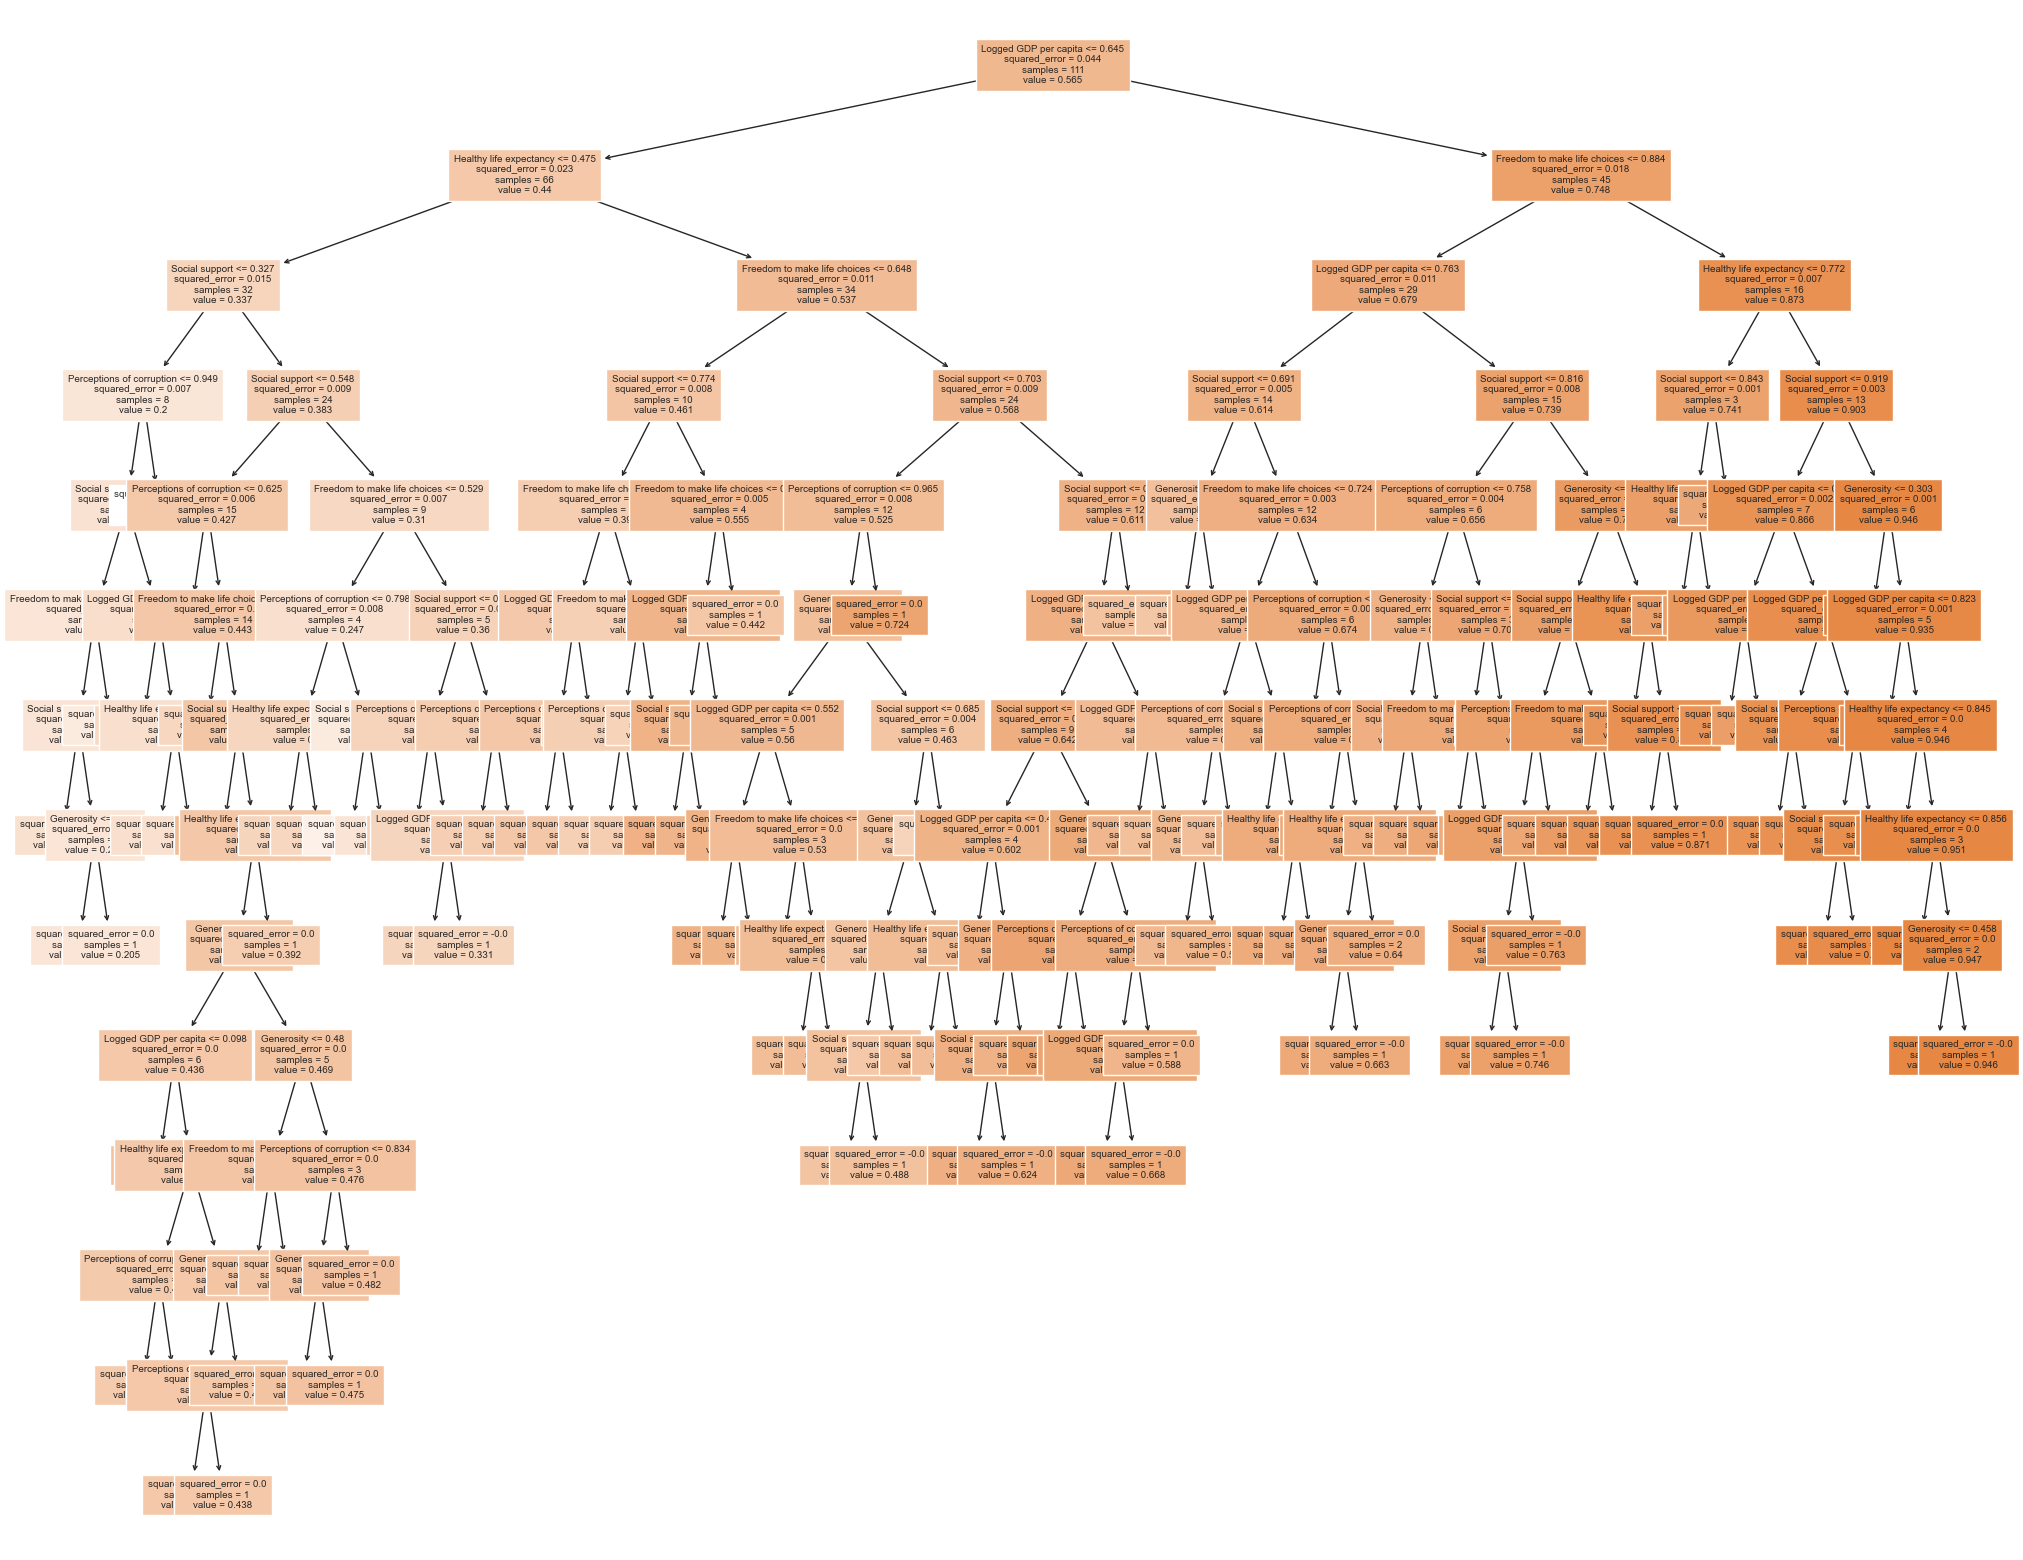

In [186]:
#Plot Decision Tree

fn=['Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=fn,fontsize=7,  
                   filled=True)

In [187]:
# printing accuracy of the above Decision Tree algorithm
print("print accuracy of Decision Tree algorithm:",dt.score(x_test,y_test))

print accuracy of Decision Tree algorithm: 0.507115064486437


In [188]:
# Using GridSearchCV for finding hyperparameter and get the best score

grid = {'min_samples_leaf': np.arange(1,25),"criterion":["squared_error","friedman_mse","absolute_error"]}
det = DecisionTreeRegressor()
det_cv = GridSearchCV(det, grid, cv=3)
det_cv.fit(x_train,y_train)

# Print hyperparameter and best score
print("Tuned hyperparameter k: ", det_cv.best_params_) 
print("Best score: ", det_cv.best_score_)

Tuned hyperparameter k:  {'criterion': 'squared_error', 'min_samples_leaf': 15}
Best score:  0.6539056440684007


In [189]:
# and then we applied KNN algorithm.
# we also used GridSearchCV for finding hyperparameter and best score

#K nearest neighbors

x_data=new_report.iloc[:,3:9]
y_data=new_report.iloc[:,2]

#normalization (min, max)
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data)).values
y = (y_data - np.min(y_data))/(np.max(y_data) - np.min(y_data))

#split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=3)



#gridsearchCV for KNN model
grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsRegressor()
knn_cv = GridSearchCV(knn, grid, cv=5) # GridSearchCV
knn_cv.fit(x_train,y_train)# Fit

# Print hyperparameter
print("Tuned hyperparameter k: ", knn_cv.best_params_)
print("Best score: ", knn_cv.best_score_)

c:\users\oldst\pycharmprojects\datascienceproject\venv\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning:

In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'

c:\users\oldst\pycharmprojects\datascienceproject\venv\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning:

In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'



Tuned hyperparameter k:  {'n_neighbors': 4}
Best score:  0.742122370619503


In [190]:
# the accuracy scores of the models are
# linear regression :  0.7920702990046679 in the multi linear regression
# decision tree : 0.6539056440684007 with hyperparameter
# KNN algorithm : 0.7430195556471237 with hyperparameter

# in sum, the highest score is 0.7920702990046679, derived by multi linear regression